In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


import torch
import torch.nn as nn
import torch.optim as optim

from skorch import NeuralNetBinaryClassifier


In [2]:
data = pd.read_csv('Data/Final Dataset.csv')
data

/var/folders/5r/dp58bhsd7wvbt6d73cxcyj840000gn/T/ipykernel_66943/4063211449.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/Final Dataset.csv')


,Season,PlayerId,Player,Position,Team,Conference,Usage Overall,Usage Pass,Usage Rush,Usage FirstDown,...,Team tacklesForLoss,Team thirdDownConversions,Team thirdDowns,Team totalYards,Team turnovers,Stars,Transfer_Portal,PositionId,TeamId,ConferenceId
0,2019,4240710,A.J. Davis,RB,Pittsburgh,ACC,0.1587,0.0525,0.3056,0.1700,...,124,84,211,4946,22,NaN,No,0,0,0
1,2019,4036066,Aaron Mathews,WR,Pittsburgh,ACC,0.0228,0.0394,0.0024,0.0246,...,124,84,211,4946,22,NaN,No,1,0,0
2,2019,4240724,Dontavius Butler-Jenkins,WR,Pittsburgh,ACC,0.0083,0.0150,0.0000,0.0025,...,124,84,211,4946,22,NaN,No,1,0,0
3,2019,4430681,Jared Wayne,WR,Pittsburgh,ACC,0.0207,0.0356,0.0024,0.0320,...,124,84,211,4946,22,NaN,No,1,0,0
4,2019,4373334,John Vardzel,WR,Pittsburgh,ACC,0.0041,0.0075,0.0000,0.0049,...,124,84,211,4946,22,NaN,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16796,2023,5077303,Jacob Lane,DE,Washington,PAC12,NaN,NaN,NaN,NaN,...,63,76,174,6931,20,NaN,No,14,57,4
16797,2023,5078420,Leroy Bryant,CB,Washington,PAC12,NaN,NaN,NaN,NaN,...,63,76,174,6931,20,NaN,No,8,57,4
16798,2023,5082671,Tristan Warner,S,Washington,PAC12,NaN,NaN,NaN,NaN,...,63,76,174,6931,20,NaN,No,9,57,4
16799,2023,5082675,Griffin Miller,LB,Washington,PAC12,NaN,NaN,NaN,NaN,...,63,76,174,6931,20,NaN,No,4,57,4


In [3]:
data.columns

Index(['Season', 'PlayerId', 'Player', 'Position', 'Team', 'Conference',
       'Usage Overall', 'Usage Pass', 'Usage Rush', 'Usage FirstDown',
       'Usage SecondDown', 'Usage ThirdDown', 'Usage StandardDowns',
       'Usage PassingDowns', 'ATT', 'AVG', 'CAR', 'COMPLETIONS', 'FGA', 'FGM',
       'FUM', 'INT', 'In 20', 'LONG', 'LOST', 'NO', 'PCT', 'PD', 'PTS',
       'QB HUR', 'REC', 'SACKS', 'SOLO', 'TB', 'TD', 'TFL', 'TOT', 'XPA',
       'XPM', 'YDS', 'YPA', 'YPC', 'YPP', 'YPR', 'Division', 'ExpectedWins',
       'Total Games', 'Total Wins', 'Total Losses', 'Total Ties',
       'ConferenceGames Games', 'ConferenceGames Wins',
       'ConferenceGames Losses', 'ConferenceGames Ties', 'HomeGames Games',
       'HomeGames Wins', 'HomeGames Losses', 'HomeGames Ties',
       'AwayGames Games', 'AwayGames Wins', 'AwayGames Losses',
       'AwayGames Ties', 'Team firstDowns', 'Team fourthDownConversions',
       'Team fourthDowns', 'Team fumblesLost', 'Team fumblesRecovered',
       'Team g

In [4]:
positions = data.Position.unique()
positions

array(['RB', 'WR', 'QB', 'TE', 'LB', 'DB', 'OL', 'DL', 'CB', 'S', 'PK',
       'LS', 'P', 'DT', 'DE', 'FB', 'C', 'OT', 'G', 'NT', 'OLB', '?'],
      dtype=object)

In [5]:
for i,year in enumerate(['2015','2016','2017','2018', '2019','2020', '2021', '2022', '2023']):
    file = pd.read_csv('Data/Player Recruit Ranking/' + year + '.csv')
    file.rename(columns = {'AthleteId': 'PlayerId'}, inplace = True)
    #file.drop(columns = ['Year', 'Rating', 'Ranking'], inplace = True)
    file.drop(columns = ['Year'], inplace = True)
    data = data.merge(file, on = 'PlayerId', how = 'left', suffixes = [None, '_' + str(i)])

In [6]:
for i in range(0,9):
    data['Stars'] = data['Stars'].combine_first(data['Stars_' + str(i)])
    data.drop(columns = ['Stars_' + str(i)], inplace = True)
for i in range(1,9):
    data['Rating'] = data['Rating'].combine_first(data['Rating_' + str(i)])
    data['Ranking'] = data['Ranking'].combine_first(data['Ranking_' + str(i)])
    data.drop(columns = ['Rating_' + str(i)], inplace = True)
    data.drop(columns = ['Ranking_' + str(i)], inplace = True)

In [7]:
data.columns[90:]

Index(['Team thirdDownConversions', 'Team thirdDowns', 'Team totalYards',
       'Team turnovers', 'Stars', 'Transfer_Portal', 'PositionId', 'TeamId',
       'ConferenceId', 'Ranking', 'Rating'],
      dtype='object')

In [8]:
position_groups = {'OL':['OL', 'NT', 'OT', 'G', 'C','FB'],
                   'TE':['TE'],
                   'QB':['QB'],
                   'RB':['RB'],
                   'WR':['WR'],
                   'DL':['DT', 'DE', 'DL'],
                   'DB':['DB', 'CB', 'S'],
                   'LB':['LB'],
                   'ST':['LS', 'P', 'PK']}

In [9]:
#Separate Data into Position Groups

data_sets = {}
for key in position_groups.keys():
    data_sets[key] = data.copy()[data.copy()['Position'].isin(position_groups[key])]

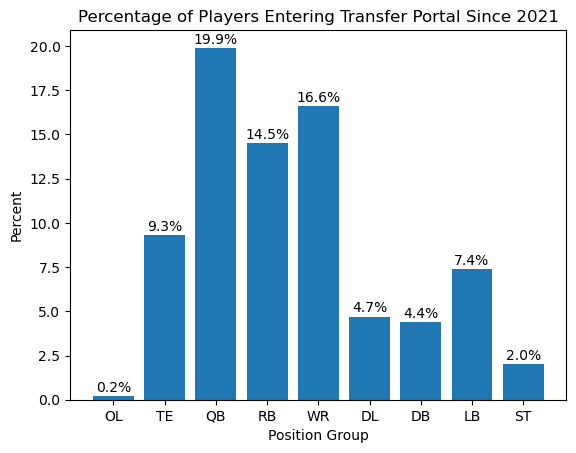

In [10]:
#Visualization showing percentage of players entering the transfer portal from each position group
#Not entirely accurate bc including 2019 data

pcts = []
for key in position_groups.keys():
    t_portal = len(data_sets[key][data_sets[key]['Transfer_Portal'] == 'Yes'])
    total = len(data_sets[key])
    pcts.append(round((t_portal/total) * 100, 1))
    
plt.bar(position_groups.keys(),pcts)

for i in range(len(position_groups.keys())):
    plt.text(list(position_groups.keys())[i], pcts[i] + 0.25, str(pcts[i]) + '%', ha = 'center')
    
plt.xlabel('Position Group')
plt.ylabel('Percent')
plt.title('Percentage of Players Entering Transfer Portal Since 2021')

plt.show()

Testing with RB Data

In [11]:
rb = data_sets['RB'].copy().drop(columns=['Player','Conference','Position','Division'])
rb['Transfer_Portal'] = np.where(rb['Transfer_Portal'].values == 'Yes', 1, 0)
rb = rb.fillna(0)

#rb.corr()

In [12]:
rb.columns

Index(['Season', 'PlayerId', 'Team', 'Usage Overall', 'Usage Pass',
       'Usage Rush', 'Usage FirstDown', 'Usage SecondDown', 'Usage ThirdDown',
       'Usage StandardDowns', 'Usage PassingDowns', 'ATT', 'AVG', 'CAR',
       'COMPLETIONS', 'FGA', 'FGM', 'FUM', 'INT', 'In 20', 'LONG', 'LOST',
       'NO', 'PCT', 'PD', 'PTS', 'QB HUR', 'REC', 'SACKS', 'SOLO', 'TB', 'TD',
       'TFL', 'TOT', 'XPA', 'XPM', 'YDS', 'YPA', 'YPC', 'YPP', 'YPR',
       'ExpectedWins', 'Total Games', 'Total Wins', 'Total Losses',
       'Total Ties', 'ConferenceGames Games', 'ConferenceGames Wins',
       'ConferenceGames Losses', 'ConferenceGames Ties', 'HomeGames Games',
       'HomeGames Wins', 'HomeGames Losses', 'HomeGames Ties',
       'AwayGames Games', 'AwayGames Wins', 'AwayGames Losses',
       'AwayGames Ties', 'Team firstDowns', 'Team fourthDownConversions',
       'Team fourthDowns', 'Team fumblesLost', 'Team fumblesRecovered',
       'Team games', 'Team interceptionTDs', 'Team interceptionYards'

In [13]:
rb['Team_Win_Performance'] = rb['Total Wins'] > rb['ExpectedWins']
rb['Team_Win_Performance'] = rb['Team_Win_Performance'].apply(lambda x: 0 if x == False else 1)
rb['Team_Rush_Yds_Pct'] = rb['Team rushingYards']/ rb['Team totalYards']
rb['Pct_Team_Rush_Yds'] = rb['YDS']/rb['Team rushingYards']
rb['Pct_Team_Rush_Attempts'] = rb['CAR']/rb['Team rushingAttempts']
rb['Pct_Team_Rush_TDs'] = rb['TD']/rb['Team rushingTDs']

rb = rb[['Season','PlayerId','TeamId','Usage Overall', 'Usage Rush', 'CAR', 'YPC', 'Team_Win_Performance', 'Team_Rush_Yds_Pct', 'Pct_Team_Rush_Yds', 'Pct_Team_Rush_Attempts', 'Pct_Team_Rush_TDs', 'Transfer_Portal', 'Stars', 'Rating', 'Ranking']]
rb.corr()

,Season,PlayerId,TeamId,Usage Overall,Usage Rush,CAR,YPC,Team_Win_Performance,Team_Rush_Yds_Pct,Pct_Team_Rush_Yds,Pct_Team_Rush_Attempts,Pct_Team_Rush_TDs,Transfer_Portal,Stars,Rating,Ranking
Season,1.000000,0.458857,0.026490,-0.020046,-0.015047,-0.069115,-0.102581,0.102305,-0.055964,-0.103444,-0.095747,-0.099048,0.036026,-0.002520,-0.023867,-0.048817
PlayerId,0.458857,1.000000,-0.020310,-0.117932,-0.116435,-0.133819,-0.113575,0.026407,0.007117,-0.134363,-0.144535,-0.131897,-0.001963,-0.115371,-0.120092,-0.044223
TeamId,0.026490,-0.020310,1.000000,0.012061,0.021862,0.119778,0.221160,0.031720,-0.092850,0.145729,0.149866,0.131425,-0.004651,0.019435,-0.006831,-0.084097
Usage Overall,-0.020046,-0.117932,0.012061,1.000000,0.985367,0.854536,0.189906,0.005380,0.021233,0.801015,0.871925,0.774884,-0.071244,0.292770,0.272734,0.055134
Usage Rush,-0.015047,-0.116435,0.021862,0.985367,1.000000,0.845163,0.179753,0.022965,-0.061519,0.818110,0.885138,0.791880,-0.065807,0.291859,0.271753,0.054914
CAR,-0.069115,-0.133819,0.119778,0.854536,0.845163,1.000000,0.287045,0.006249,0.037885,0.846768,0.954766,0.823874,-0.044063,0.271818,0.245244,0.040136
YPC,-0.102581,-0.113575,0.221160,0.189906,0.179753,0.287045,1.000000,-0.004533,0.098502,0.296400,0.283837,0.258751,-0.022277,0.135768,0.112503,-0.003099
Team_Win_Performance,0.102305,0.026407,0.031720,0.005380,0.022965,0.006249,-0.004533,1.000000,-0.222733,0.027261,0.005588,0.009536,0.017052,0.022334,0.009251,-0.040640
Team_Rush_Yds_Pct,-0.055964,0.007117,-0.092850,0.021233,-0.061519,0.037885,0.098502,-0.222733,1.000000,-0.161459,-0.054630,-0.087277,-0.042411,-0.015803,-0.014700,0.000215
Pct_Team_Rush_Yds,-0.103444,-0.134363,0.145729,0.801015,0.818110,0.846768,0.296400,0.027261,-0.161459,1.000000,0.922457,0.868526,-0.044822,0.264892,0.242771,0.034619


In [14]:

#0 means not improved, 1 means improved, 2 means freshman or did not play previous season
def improve(row, column):
    try: 
        id = int(row['PlayerId'])
        season = int(row['Season'])
        column = column
        imp = float(rb[(rb['PlayerId'] == id) & (rb['Season'] == season)][column]) > float(rb[(rb['PlayerId'] == id) & (rb['Season'] == season-1)][column])
        return(int(imp)) 
    except:
        return 1 
 
    

In [15]:
rb['Usage Ovr Improve'] = rb.apply(lambda x: improve(x, 'Usage Overall'), axis = 1)
rb['Usage Rush Improve'] = rb.apply(lambda x: improve(x, 'Usage Rush'), axis = 1)
rb['CAR Improve'] = rb.apply(lambda x: improve(x, 'CAR'), axis = 1)
rb['YPC Improve'] = rb.apply(lambda x: improve(x, 'YPC'), axis = 1)
rb['Pct Rush Yds Improve'] = rb.apply(lambda x: improve(x, 'Pct_Team_Rush_Yds'), axis = 1)
rb['Pct Rush Att Improve'] = rb.apply(lambda x: improve(x, 'Pct_Team_Rush_Attempts'), axis = 1)
rb['Pct Team Rush TDs Improve'] = rb.apply(lambda x: improve(x, 'Pct_Team_Rush_TDs'), axis = 1)


/var/folders/5r/dp58bhsd7wvbt6d73cxcyj840000gn/T/ipykernel_66943/124721708.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  imp = float(rb[(rb['PlayerId'] == id) & (rb['Season'] == season)][column]) > float(rb[(rb['PlayerId'] == id) & (rb['Season'] == season-1)][column])
/var/folders/5r/dp58bhsd7wvbt6d73cxcyj840000gn/T/ipykernel_66943/124721708.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  imp = float(rb[(rb['PlayerId'] == id) & (rb['Season'] == season)][column]) > float(rb[(rb['PlayerId'] == id) & (rb['Season'] == season-1)][column])
/var/folders/5r/dp58bhsd7wvbt6d73cxcyj840000gn/T/ipykernel_66943/124721708.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  imp = float(rb[(rb['Player

In [16]:
rb

,Season,PlayerId,TeamId,Usage Overall,Usage Rush,CAR,YPC,Team_Win_Performance,Team_Rush_Yds_Pct,Pct_Team_Rush_Yds,...,Stars,Rating,Ranking,Usage Ovr Improve,Usage Rush Improve,CAR Improve,YPC Improve,Pct Rush Yds Improve,Pct Rush Att Improve,Pct Team Rush TDs Improve
0,2019,4240710,0,0.1587,0.3056,127.0,4.2,1,0.312171,0.517487,...,4.0,0.8945,303.0,1,1,1,1,1,1,1
11,2019,4240711,0,0.0560,0.1222,50.0,5.0,1,0.312171,0.185881,...,4.0,0.9000,273.0,1,1,1,1,1,1,1
14,2019,4568660,0,0.0685,0.1443,60.0,5.1,1,0.312171,0.226036,...,3.0,0.8613,856.0,1,1,1,1,1,1,1
61,2019,4037221,1,0.1559,0.2881,158.0,3.9,0,0.378441,0.283961,...,3.0,0.8457,931.0,1,1,1,1,1,1,1
62,2019,4240418,1,0.0741,0.1303,71.0,4.3,0,0.378441,0.206836,...,0.0,0.0000,0.0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16998,2023,4689338,57,0.2639,0.5833,233.0,5.1,1,0.256240,0.782658,...,3.0,0.8830,441.0,1,1,1,0,1,1,1
17011,2023,4361095,57,0.0051,0.0126,5.0,6.0,1,0.256240,0.028153,...,3.0,0.8767,525.0,0,0,0,1,0,0,0
17013,2023,4429186,57,0.0123,0.0253,10.0,2.3,1,0.256240,0.021959,...,4.0,0.9015,287.0,0,0,0,0,0,0,0
17014,2023,4921520,57,0.0554,0.1111,44.0,4.2,1,0.256240,0.144144,...,3.0,0.8725,786.0,1,1,1,1,1,1,1


In [17]:
#Get Rid of 2019 Data
rb = rb[rb['Season'] != 2019]

In [18]:
k_folds = KFold(n_splits=5)
#Unbalanced Data
X = rb.copy().drop(columns = ['Transfer_Portal', 'PlayerId', 'Season'])
y = rb.copy()['Transfer_Portal']



In [34]:
def classifiers(X,y):
    SVM_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=42))
    forest_clf = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
    gb_clf = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42))

    SVM_f1 = cross_val_score(SVM_clf, X, y, cv=k_folds, scoring='f1')
    forest_f1 = cross_val_score(forest_clf, X, y, cv=k_folds, scoring='f1')
    gb_f1 = cross_val_score(gb_clf, X, y, cv=k_folds, scoring='f1')

    SVM_pre = cross_val_score(SVM_clf, X, y, cv=k_folds, scoring='precision')
    forest_pre = cross_val_score(forest_clf, X, y, cv=k_folds, scoring='precision')    
    gb_pre = cross_val_score(gb_clf, X, y, cv=k_folds, scoring='precision')
    
    SVM_re = cross_val_score(SVM_clf, X, y, cv=k_folds, scoring='recall')
    forest_re = cross_val_score(forest_clf, X, y, cv=k_folds, scoring='recall')
    gb_re = cross_val_score(gb_clf, X, y, cv=k_folds, scoring='recall')

    print('F1 Scores')
    print('SVM', SVM_f1.mean())
    print('Random Forest',forest_f1.mean())
    print('Gradient Boosting', gb_f1.mean())
    print(' ')
    print('Precision Scores')
    print('SVM',SVM_pre.mean())
    print('Random Forest',forest_pre.mean())
    print('Gradient Boosting', gb_pre.mean())
    print(' ')
    print('Recall Scores')
    print('SVM', SVM_re.mean())
    print('Random Forest',forest_re.mean())
    print('Gradient Boosting', gb_re.mean())

classifiers(X,y)

/Users/yashdave/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashdave/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashdave/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yashdave/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classifica

F1 Scores
SVM 0.010526315789473686
Random Forest 0.1390186023359996
Gradient Boosting 0.36622131634339816
 
Precision Scores
SVM 0.2
Random Forest 0.7933333333333333
Gradient Boosting 0.7920454545454545
 
Recall Scores
SVM 0.005405405405405406
Random Forest 0.0776615104987198
Gradient Boosting 0.2455279399000329


In [20]:
#Balance Data
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
balancer_train = SMOTE(random_state = 42, k_neighbors=5)
X_train_b, y_train_b = balancer_train.fit_resample(X_train, y_train)


#Run Classifier Function w/ Balanced Data
classifiers(X_train_b, y_train_b)

F1 Scores
SVM 0.6401189024291761
Random Forest 0.7407693788725409
Gradient Boosting 0.7156374767265388
 
Precision Scores
SVM 0.6216777473263766
Random Forest 0.7042652438001274
Gradient Boosting 0.6930525921288547
 
Recall Scores
SVM 0.7322983312983313
Random Forest 0.8173271604938271
Gradient Boosting 0.7770937457604123


In [21]:
clf_r = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)).fit(X_train_b, y_train_b)
clf_s = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train_b, y_train_b)
clf_gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state = 42, n_estimators=100, max_features = 'sqrt')).fit(X_train_b, y_train_b)

In [22]:
preds = clf_gb.predict(X_test)
print(f1_score(y_test, preds, average = 'binary'))
print(precision_score(y_test, preds, average = 'binary'))
print(recall_score(y_test, preds, average = 'binary'))
print(' ')

preds = clf_r.predict(X_test)
print(f1_score(y_test, preds, average = 'binary'))
print(precision_score(y_test, preds, average = 'binary'))
print(recall_score(y_test, preds, average = 'binary'))
print(' ')

preds = clf_s.predict(X_test)
print(f1_score(y_test, preds, average = 'binary'))
print(precision_score(y_test, preds, average = 'binary'))
print(recall_score(y_test, preds, average = 'binary'))

0.49382716049382713
0.43478260869565216
0.5714285714285714
 
0.46478873239436613
0.4583333333333333
0.4714285714285714
 
0.3832335329341317
0.32989690721649484
0.45714285714285713


Deep Learning Test

In [27]:
class DeepLearningClassifier(nn.Module):
    def __init__(self):
        super(DeepLearningClassifier, self).__init__()

        self.linear_relu = nn.Sequential(
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.linear_relu(x)

In [57]:
deep_X_train = torch.as_tensor(X_train_b.values, dtype = torch.float32)
deep_y_train = torch.as_tensor(y_train_b.to_numpy(), dtype = torch.float32)

np.random.seed(42)
torch.manual_seed(42)

deep_learning = NeuralNetBinaryClassifier(DeepLearningClassifier, 
                                          criterion = nn.BCELoss, 
                                          optimizer = optim.Adam, 
                                          lr = 0.0001, 
                                          max_epochs = 1000, 
                                          batch_size = 5,
                                          verbose = 0)
#deep_pre = cross_val_score(deep_learning, deep_X_train, deep_y_train, cv = k_folds, scoring = 'precision')
#deep_re = cross_val_score(deep_learning, deep_X_train, deep_y_train, cv = k_folds, scoring = 'recall')

In [58]:
#print(deep_pre.mean())
#print(deep_re.mean())

In [59]:
deep_learning.fit(deep_X_train, deep_y_train)

<class 'skorch.classifier.NeuralNetBinaryClassifier'>[initialized](
  module_=DeepLearningClassifier(
    (linear_relu): Sequential(
      (0): Linear(in_features=20, out_features=20, bias=True)
      (1): ReLU()
      (2): Linear(in_features=20, out_features=20, bias=True)
      (3): ReLU()
      (4): Linear(in_features=20, out_features=20, bias=True)
      (5): ReLU()
      (6): Linear(in_features=20, out_features=1, bias=True)
      (7): Sigmoid()
    )
  ),
)

In [60]:
deep_X_test = torch.as_tensor(X_test.values, dtype = torch.float32)
deep_y_test = torch.as_tensor(y_test.to_numpy(), dtype = torch.float32)

In [61]:
preds = deep_learning.predict(deep_X_test)
print(f1_score(deep_y_test, preds))
print(recall_score(deep_y_test, preds))
print(precision_score(deep_y_test, preds))


0.35251798561151076
0.7
0.23557692307692307


In [33]:
#Deep learning and Gradient Boosting Classifier gets better recall compared to other models on the unseen test data

#This might be an ok result for us, since the cost of potentially acting on a player that is falsely identified as a
#transfer risk is low, but the cost of not acting on a player that is correctly identified as a transfer risk is high. 

#Therefore, in our case, recall might be the more important metric to consider.

#We still probably want to get a higher precision than we currently are (aim to get f1 score above 0.5)